**Import libraries**

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import missingno as msno
%matplotlib inline
from scipy import stats

**Import data file**

---

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart_statlog_cleveland_hungary_final.csv")
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [7]:
from google.colab import files
uploaded= files.upload()

Saving heart_statlog_cleveland_hungary_final.csv to heart_statlog_cleveland_hungary_final.csv


In [202]:
df = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
df.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [203]:
#Verifying the number of columns and rows
df.shape

(1190, 12)

In [10]:
# Column names
df.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [11]:
#Data type information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


**Data Cleaning and pre-processing**

---



In [204]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope','target']

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      1190 non-null   int64  
 1   sex                      1190 non-null   int64  
 2   chest_pain_type          1190 non-null   int64  
 3   resting_blood_pressure   1190 non-null   int64  
 4   cholesterol              1190 non-null   int64  
 5   fasting_blood_sugar      1190 non-null   int64  
 6   rest_ecg                 1190 non-null   int64  
 7   max_heart_rate           1190 non-null   int64  
 8   exercise_induced_angina  1190 non-null   int64  
 9   st_depression            1190 non-null   float64
 10  st_slope                 1190 non-null   int64  
 11  target                   1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [205]:
#Replacing the values to categorical values
df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['sex'] = df['sex'].apply(lambda  x: 'male' if x==1 else 'female')

df['target'] = df['target'].apply(lambda  x:'Cardiac_Disease' if x==1 else 'No_Cardiac_Disease')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [206]:
df['chest_pain_type'].value_counts()

asymptomatic        625
non-anginal pain    283
atypical angina     216
typical angina       66
Name: chest_pain_type, dtype: int64

In [207]:
df['rest_ecg'].value_counts()

normal                          684
left ventricular hypertrophy    325
ST-T wave abnormality           181
Name: rest_ecg, dtype: int64

In [208]:
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
0                1
Name: st_slope, dtype: int64

In [211]:
#remove the values which has 0
df.drop(df[df.st_slope ==0].index, inplace=True)
#checking distribution
df['st_slope'].value_counts()

flat           582
upsloping      526
downsloping     81
Name: st_slope, dtype: int64

1. Data types verification
---

In [212]:
df.nunique()

age                         50
sex                          2
chest_pain_type              4
resting_blood_pressure      67
cholesterol                222
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate             119
exercise_induced_angina      2
st_depression               53
st_slope                     3
target                       2
dtype: int64

In [48]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                    object
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                    object
target                      object
dtype: object

2. Finding the missing values and replace them

---



In [213]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
dtype: int64

There is no missing values in the dataset

3. Finding the duplicate rows
---

In [214]:
repeated=df.duplicated().sum()
if repeated:
  print("Available duplicate rows are: {}".format(repeated))
else:
  print("There is no duplicate records")

Available duplicate rows are: 272


In [51]:
repeated=df[df.duplicated(keep=False)]
repeated.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,target
90,49,female,atypical angina,110,208,0,normal,160,0,0.0,upsloping,No_Cardiac_Disease
163,49,female,atypical angina,110,208,0,normal,160,0,0.0,upsloping,No_Cardiac_Disease
556,58,male,non-anginal pain,150,219,0,ST-T wave abnormality,118,1,0.0,flat,Cardiac_Disease
604,58,male,non-anginal pain,150,219,0,ST-T wave abnormality,118,1,0.0,flat,Cardiac_Disease
617,70,male,asymptomatic,130,322,0,left ventricular hypertrophy,109,0,2.4,flat,Cardiac_Disease


In [215]:
df=df.drop_duplicates()
df.shape

(917, 12)

4. Statistics summary
---

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,target
0,40,male,atypical angina,140,289,0,normal,172,0,0.0,upsloping,No_Cardiac_Disease
1,49,female,non-anginal pain,160,180,0,normal,156,0,1.0,flat,Cardiac_Disease
2,37,male,atypical angina,130,283,0,ST-T wave abnormality,98,0,0.0,upsloping,No_Cardiac_Disease
3,48,female,asymptomatic,138,214,0,normal,108,1,1.5,flat,Cardiac_Disease
4,54,male,non-anginal pain,150,195,0,normal,122,0,0.0,upsloping,No_Cardiac_Disease


In [33]:
df.describe()

,age,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate,exercise_induced_angina,st_depression
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.495093,132.377317,198.803708,0.232279,136.814613,0.404580,0.888332
std,9.425601,18.515114,109.443764,0.422517,25.473732,0.491078,1.066749
min,28.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000
25%,47.000000,120.000000,173.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000


In [34]:
df.describe(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,sex,chest_pain_type,rest_ecg,st_slope,target
count,917,917,917,917,917
unique,2,4,3,3,2
top,male,asymptomatic,normal,flat,Cardiac_Disease
freq,724,496,551,459,507


5. Find outliers and remove them
---

In [ ]:
df.shape

(917, 12)

In [ ]:
#Setting the style for visualization
plt.style.use('seaborn')
#Assign the sizing parameters
plt.rcParams['figure.figsize'] = [20, 10]

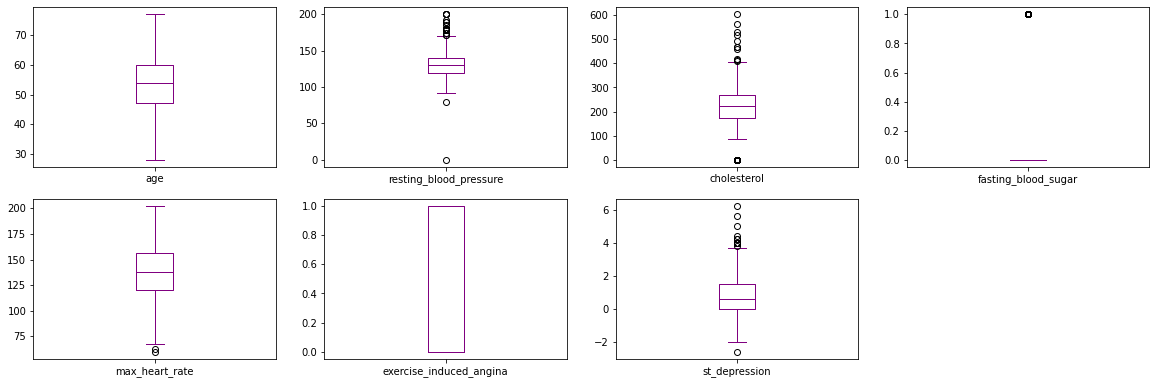

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,4),
        sharex=False,sharey=False, figsize=(20,10),
        color='purple');

Define the continuous variables and listing the outliers

In [38]:
Continuous_var=['age','resting_blood_pressure','cholesterol','max_heart_rate','st_depression']
def outliers(df_out, drop = False):
  for each_var in df_out.columns:
    feature_data = df_out[each_var]
    # 25th percentile of the data of the given feature
    Q1 = np.percentile(feature_data, 25.)
    # 75th percentile of the data of the given feature
    Q3 = np.percentile(feature_data, 75.)
    #Interquartile Range
    IQR = Q3-Q1
    Outlier_stage=IQR * 1.5
    outliers = feature_data[~((feature_data >= Q1 - Outlier_stage) & (feature_data <= Q3 + Outlier_stage))].index.tolist()
    if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_var, len(outliers)))
    if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_var))
outliers(df[Continuous_var])

For the feature age, No of Outliers is 0
For the feature resting_blood_pressure, No of Outliers is 28
For the feature cholesterol, No of Outliers is 183
For the feature max_heart_rate, No of Outliers is 2
For the feature st_depression, No of Outliers is 16


In [39]:
#Removing outliers
outliers(df[Continuous_var],drop=True)

Outliers from age feature removed
Outliers from resting_blood_pressure feature removed
Outliers from cholesterol feature removed
Outliers from max_heart_rate feature removed
Outliers from st_depression feature removed


**HYPOTHESIS**

---



H1 : The higher the level of age , the higher the risk of getting cardiovascular disease among the male demographic.

H2 : The average age of a person who is having cardiovascular disease is higher than the the average age of a person who doesn't have a cardiovascular disease.

H3 : There is significant difference in the heart rate of the person who have cardiovascular disease compared to the person the who don't have cardiovascular disease.

H4 : The conditional probability of a cardiac person is relatively high when they have an angina after excercise.

H5 : There is an association between asymptomatic chestpain type and cardiovascular disease.The higher the level of asymptomatic chest pain , the higher the probability of having heart disease.

**Feature distribution and relationship among each others**

---



1. Continuous Features Distribution

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

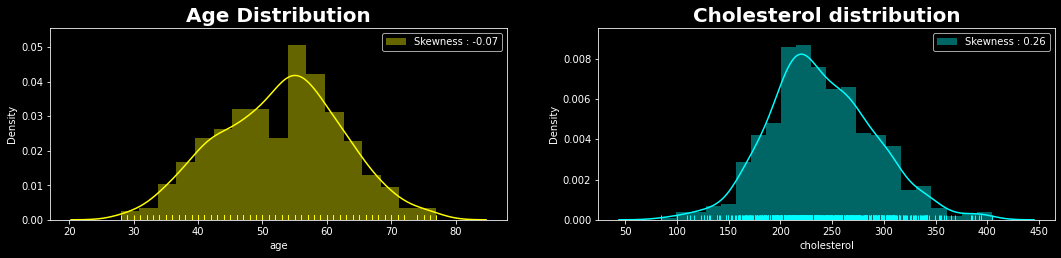

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103

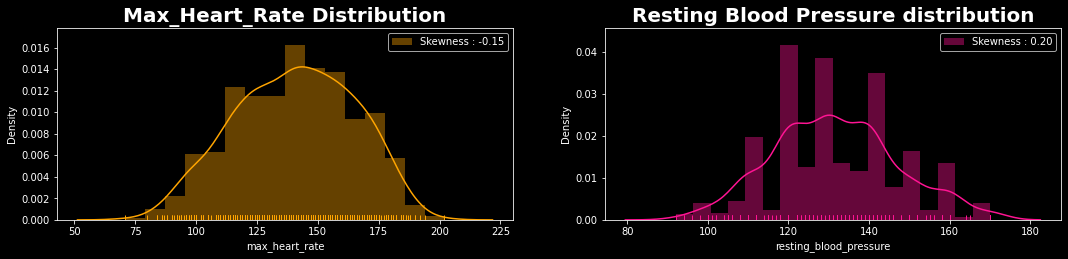

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


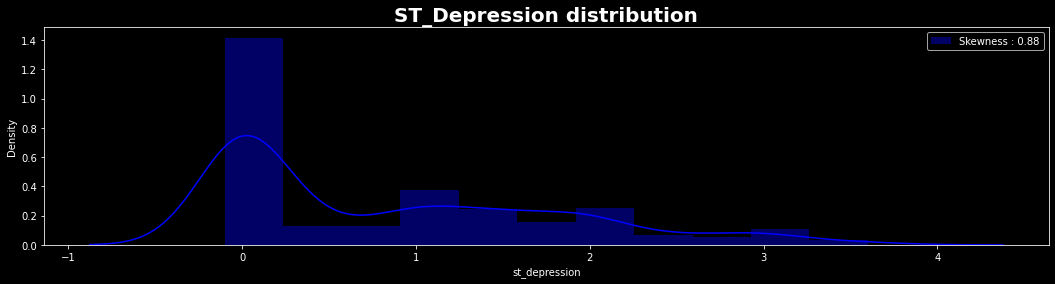

In [41]:
plt.style.use("dark_background")
plt.figure(figsize=(18,12))
plt.subplot(321)
diag= sns.distplot(df['age'], rug=True, color='yellow',label='Skewness : %.2f'%df['age'].skew())
plt.title("Age Distribution",fontsize=20,fontweight="bold")
plt.grid(False)
plt.legend()
plt.subplot(322)
plt.style.use("dark_background")
#sns.set(style='ticks')
diag= sns.distplot(df['cholesterol'], rug=True, color='cyan',label='Skewness : %.2f'%df['cholesterol'].skew())
plt.title("Cholesterol distribution", fontsize=20,fontweight="bold")
plt.grid(False)
plt.legend()
plt.show()
plt.figure(figsize=(18,12))
plt.subplot(323)
diag= sns.distplot(df['max_heart_rate'], rug=True, color='orange',label='Skewness : %.2f'%df['max_heart_rate'].skew())
plt.title("Max_Heart_Rate Distribution",fontsize=20,fontweight="bold")
plt.grid(False)
plt.legend()
plt.subplot(324)
#plt.style.use("dark_background")
#sns.set(style='ticks')
diag= sns.distplot(df['resting_blood_pressure'], rug=True, color='deeppink',label='Skewness : %.2f'%df['resting_blood_pressure'].skew())
plt.title("Resting Blood Pressure distribution", fontsize=20,fontweight="bold")
plt.grid(False)
plt.legend()
plt.show()
plt.figure(figsize=(18,4))
sns.distplot(df['st_depression'],color='blue',label='Skewness : %.2f'%df['st_depression'].skew())
plt.title("ST_Depression distribution", fontsize=20,fontweight="bold")
plt.grid(False)
plt.legend()

**Skewness** - It is a measurement to check whether the feature is normally distributed or not. If the skewness value is near to 0 then the particular feature is normally distributed.

From the above visualization, looks like all the features are normally distributed except st_depression.

To confirm this again, we will perform the normality test.

In [40]:
CF = ['age','resting_blood_pressure','cholesterol','st_depression','max_heart_rate']
for i in CF:
    alpha= 0.005 #singificance-level
    c,p = stats.normaltest(df[i],nan_policy='omit')
    
    if p>alpha:
        print('{} ----> Normally distributed'.format(i))
    else:
        print('{} ---->  Not normally distributed'.format(i))

age ----> Normally distributed
resting_blood_pressure ----> Normally distributed
cholesterol ----> Normally distributed
st_depression ---->  Not normally distributed
max_heart_rate ---->  Not normally distributed


**H1 : The higher the level of age , the higher the risk of getting cardiovascular disease among the male demographic.**

**H2 : The average age of a person who is having cardiovascular disease is higher than the the average age of a person who doesn't have a cardiovascular disease.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

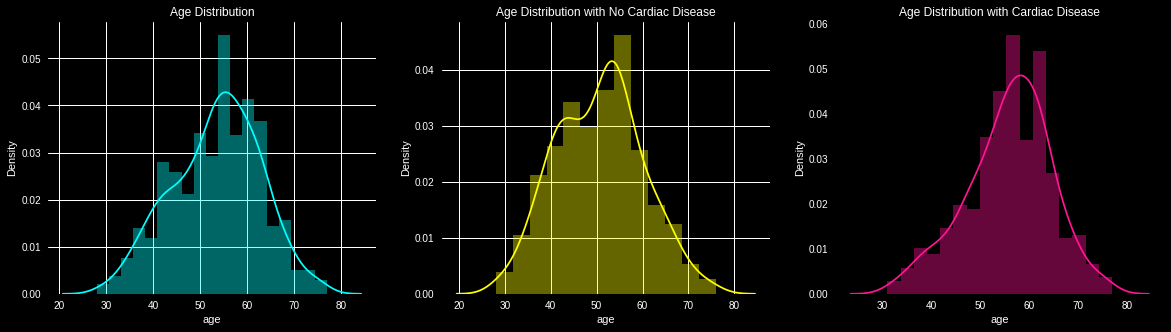

In [55]:
#sns.set_style("ticks")
d1=df[df['target']=='No_Cardiac_Disease']
d2=df[df['target']=='Cardiac_Disease']
plt.style.use('dark_background')
age_heart_disease = df.groupby('target')['age']
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
ax = sns.distplot(df['age'],color='cyan',ax=axis1).set_title("Age Distribution")
plt.grid(False)
#ax.set(xlabel='Age')
#ax = sns.distplot(age_heart_disease.get_group('Cardiac_Disease'),ax=axis2)
ax = sns.distplot(d1['age'],color='yellow',ax=axis2)
ax.set(title="Age Distribution with No Cardiac Disease")
plt.grid(False)
#ax.set(xlabel='Age With No Cardiac Disease')
ax = sns.distplot(d2['age'],color='deeppink',ax=axis3)
ax.set(title="Age Distribution with Cardiac Disease")
#ax.set(xlabel='Age With Cardiac Disease')
plt.grid(False)

In [56]:
#Explore the average of age feature for Patients
print("Minimum Age:{}".format(min(df['age'])))
print("Maximum Age:{}".format(max(df['age'])))
print("Mean value of Age:{}".format(round(df.age.mean())))

Minimum Age:28
Maximum Age:77
Mean value of Age:53


In [57]:
#Explore the average of age feature for Non-Cardiac Patients
print("Minimum Age:{}".format(min(d1['age'])))
print("Maximum Age:{}".format(max(d1['age'])))
print("Mean value of Age:{}".format(round(d1.age.mean())))

Minimum Age:28
Maximum Age:76
Mean value of Age:51


In [58]:
#Explore the average of age feature for Cardiac Patients
print("Minimum Age:{}".format(min(d2['age'])))
print("Maximum Age:{}".format(max(d2['age'])))
print("Mean value of Age:{}".format(round(d2.age.mean())))

Minimum Age:31
Maximum Age:77
Mean value of Age:56


Target Variable Distribution

---



In [59]:
print(df.target.value_counts())


Cardiac_Disease       507
No_Cardiac_Disease    410
Name: target, dtype: int64


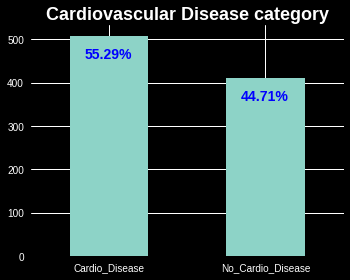

In [60]:
plt.style.use('dark_background')
df['target'] = df.target.replace({1: "Cardio_Disease", 0: "No_Cardio_Disease"})
figure, axis = plt.subplots(figsize=(5,4))
category = ["Cardio_Disease", "No_Cardio_Disease"]
axis = df.target.value_counts().plot(kind='bar')
axis.set_title("Cardiovascular Disease category", fontsize = 18, weight = 'bold')
axis.set_xticklabels (category, rotation = 0)

#Percentage calculation for cardio disease category
aggregated = []
for i in axis.patches:
    aggregated.append(i.get_height())
total = sum(aggregated)
for i in axis.patches:
    axis.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='blue', weight = 'bold')    
plt.tight_layout()
plt.show()

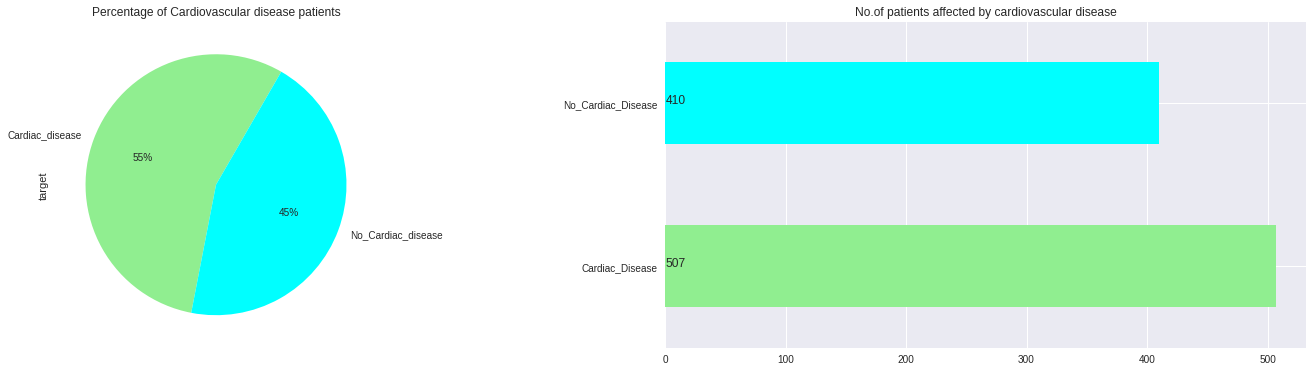

In [61]:
#Plotting based on the target variable
plt.style.use('seaborn')
figure, (axis1, axis2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))
colors = ("lightgreen","cyan")
axis1 = df['target'].value_counts().plot.pie( x="Cardiovascular disease" ,y ='Patients Count', 
                                             autopct = "%1.0f%%",labels=["Cardiac_disease","No_Cardiac_disease"], startangle = 60, ax=axis1, colors=colors)
axis1.set(title = 'Percentage of Cardiovascular disease patients')

axis2 = df["target"].value_counts().plot.barh(ax =axis2, color=colors)
for i,j in enumerate(df["target"].value_counts().values):
    axis2.text(.5,i,j,fontsize=12)
axis2.set(title = 'No.of patients affected by cardiovascular disease')
plt.subplots_adjust(left=0.1,
                    right=1.5)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of Age')

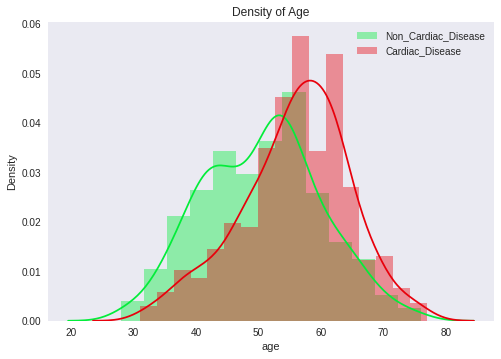

In [62]:
plt.style.use('seaborn-bright')
sns.distplot(d1['age'],label='Non_Cardiac_Disease',color='#03ED3A')
sns.distplot(d2['age'],label='Cardiac_Disease',color='#E8000B')
plt.legend()
plt.grid(False)
plt.title('Density of Age')

In [63]:
x = []
for i in range(0,len(df)):
    if((df['age'].iloc[i] > 0) & (df['age'].iloc[i] < 20)):
        x.append('0-20')
    elif((df['age'].iloc[i] > 20) & (df['age'].iloc[i] < 40) ):
        x.append('21-50')
    elif((df['age'].iloc[i] > 40) & (df['age'].iloc[i] < 60) ):
        x.append('51-60')
    else:
        x.append('> 60')
        
df['Group_Age'] = x

In [64]:
!pip install squarify


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
import matplotlib.pyplot as plt
import squarify

In [67]:
df['target'] = df['target'].apply(lambda  x:1 if x=='Cardiac_Disease' else 0)

In [68]:
df['target']

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 917, dtype: int64

Text(0.5, 1.0, 'Gender Distribution')

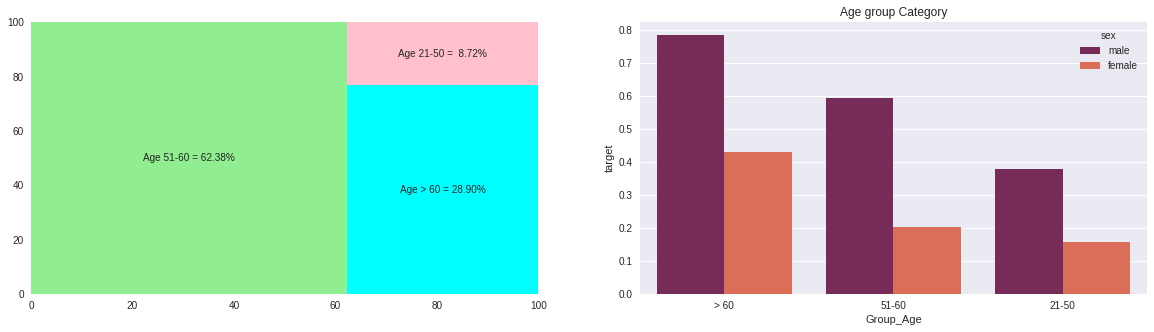

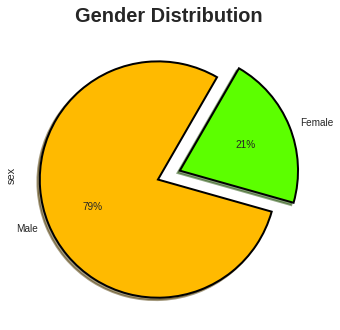

In [69]:

fig,(axis1,axis2) = plt.subplots(1,2,figsize=(20,5))
df['Group_Age'].value_counts()
labels = df['Group_Age'].value_counts().index
sizes = df['Group_Age'].value_counts().values
colors = ['lightgreen', 'cyan', 'pink']

perc = [str('{:5.2f}'.format(i/df['Group_Age'].value_counts().sum()*100)) + "%" for i in df['Group_Age'].value_counts()]
lbl = ["Age" + " " + el[0] + " = " + el[1] for el in zip(df['Group_Age'].value_counts().index, perc)]
#squarify.plot(sizes=sizes, label=lbl, alpha=.8,ax=axis1)
#squarify.plot(label=lbl,ax=axis,sizes=sizes)
squarify.plot(sizes=sizes,color=colors,label = lbl,ax=axis1)
#plt.axis('off')


plt.title('Age group Category')
sns.barplot(x='Group_Age',y='target',hue='sex',data=df,palette="rocket",ci=None,ax=axis2)
plt.figure(figsize=(18,12))
plt.subplot(233)
df["sex"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("gist_rainbow",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Gender Distribution",fontsize=20,fontweight="bold")
#plt.title('Age Group Vs Sex Vs Target')
#sns.barplot(x='sex',y='target',data=df,palette="coolwarm",ci=None,ax=axis3)
#plt.title('Sex Vs Target')

In [96]:
import scipy.stats as st
import math
t,p=st.ttest_ind(d1['age'], d2['age'], equal_var = False)
r = math.sqrt(t**2/(t**2 + ( 507+ 410 - 2)))
print("T-Test result for H1 Hypothesis:")
print("T Value =", round(t, 3))
print("P value =", round(p, 3))
print("Effect Size (r) =", round(r, 3))

T-Test result for H1 Hypothesis:
T Value = -8.783
P value = 0.0
Effect Size (r) = 0.279


**RESULT:**
From the above Density of Age visualization, we can observe that age distribution of the Non-Cardic patient is shifted downward when compared to the age distribution of cardiac patient.

The maximum cardiovascular disease is affected by the people aged over 55.

Based on the testing, p value is less than 0.05 and the effect size (r) is 
0.279 which indicates that our alternate hypothesis true that is the average age of a person is having cardiovascular disease is higher than the person who doesn't have a cardiovascular disease and mostly among the male demographic.



**H3 : The probability of the Cardiovascular disease patient heart rate is higher than the non-cardiovascular disease patient heart rate.**

Maximum Heart Rate

---



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

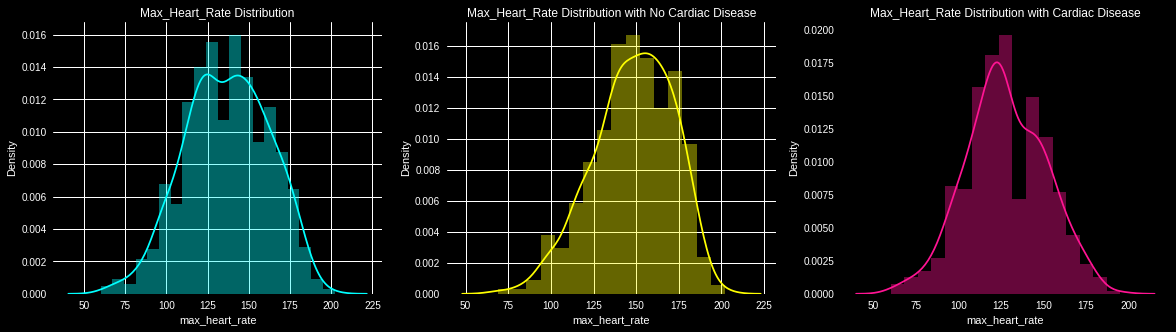

In [73]:
plt.style.use('dark_background')
#age_heart_disease = df.groupby('target')['max_heart_rate']
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(20,5))
ax = sns.distplot(df['max_heart_rate'],color='cyan',ax=axis1).set_title("Max_Heart_Rate Distribution")
plt.grid(False)
#ax.set(xlabel='Age')
#ax = sns.distplot(age_heart_disease.get_group('Cardiac_Disease'),ax=axis2)
ax = sns.distplot(d1['max_heart_rate'],color='yellow',ax=axis2)
ax.set(title="Max_Heart_Rate Distribution with No Cardiac Disease")
plt.grid(False)
#ax.set(xlabel='Age With No Cardiac Disease')
ax = sns.distplot(d2['max_heart_rate'],color='deeppink',ax=axis3)
ax.set(title="Max_Heart_Rate Distribution with Cardiac Disease")
plt.grid(False)
#ax.set(xlabel='Age With Cardiac Disease')

Two Sample T-test with unequal Variance

---



In [ ]:
mean = df.groupby('target')['max_heart_rate'].mean()
std = df.groupby('target')['max_heart_rate'].std()
stat = pd.DataFrame({'Group':['No_Cardiac_Disease','Cardiac_Disease'],'Max_heart_rate_Mean':mean.values,'Max_heart_rate_Std':std.values,
                       'Sample_Size':[len(d1['max_heart_rate']),len(d2['max_heart_rate'])]})
stat

,Group,Max_heart_rate_Mean,Max_heart_rate_Std,Sample_Size
0,No_Cardiac_Disease,127.646943,23.409223,410
1,Cardiac_Disease,148.151220,23.288067,507


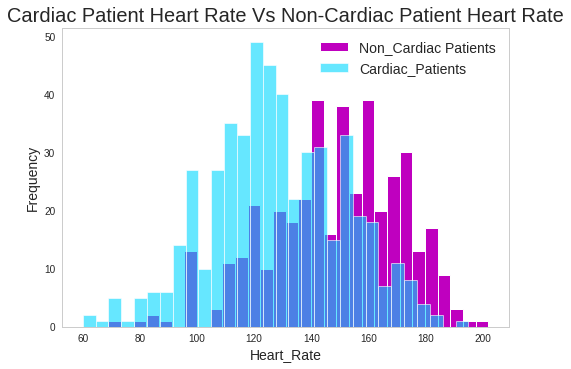

In [77]:
plt.style.use('seaborn-whitegrid')
d1['max_heart_rate'].plot.hist(bins = 30, color='m',edgecolor = 'white', 
linewidth = 1.0, label = 'Non_Cardiac Patients')
d2['max_heart_rate'].plot.hist(bins = 30, color='#00D7FF',edgecolor = 'white', 
linewidth = 1.0, alpha = 0.6, label = 'Cardiac_Patients')
plt.title('Cardiac Patient Heart Rate Vs Non-Cardiac Patient Heart Rate', 
fontsize = 20)
plt.xlabel('Heart_Rate', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.legend(fontsize = 14)
plt.grid(False)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Density of Heart Rate')

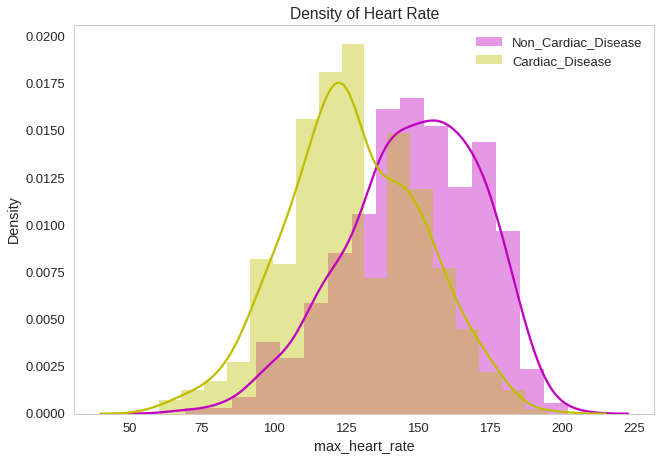

In [78]:
plt.style.use('seaborn-talk')
#sns.distplot(d1['max_heart_rate'],label='Non_Cardiac_Disease',color='#03ED3A')
sns.distplot(d1['max_heart_rate'],label='Non_Cardiac_Disease',color='m')
sns.distplot(d2['max_heart_rate'],label='Cardiac_Disease',color='y')
#sns.distplot(d2['max_heart_rate'],label='Cardiac_Disease',color='#E8000B')
plt.legend()
plt.grid(False)
plt.title('Density of Heart Rate')

In [97]:
t,p=st.ttest_ind(d1['max_heart_rate'], d2['max_heart_rate'], equal_var = False)
r = math.sqrt(t**2/(t**2 + ( 507+ 410 - 2)))
print("T-Test result for H2 Hypothesis:")
print("T Value =", round(t, 3))
print("P Value =", round(p, 3))
print("Effect Size (r) =", round(r, 3))

T-Test result for H2 Hypothesis:
T Value = 13.225
P Value = 0.0
Effect Size (r) = 0.401


**RESULT**:

Based on the above figure and testing, the p value is 0.00 and the effect size is 0.401. This resultant that the heart rate of the cardiac person is significantly different from the non-cardiac patient.


**H4 : The conditional probability of a cardiac person is relatively high when they have an angina after excercise.**

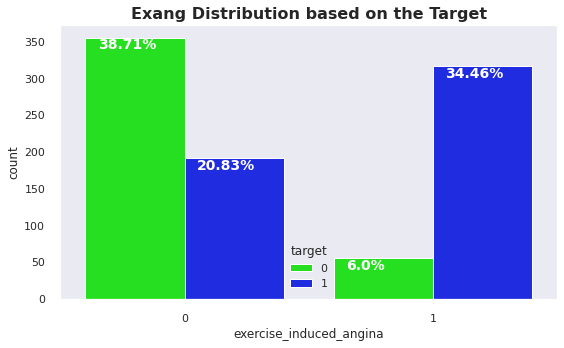

In [101]:
figure, axis = plt.subplots(figsize=(8,5))
Category = d2['exercise_induced_angina']
axis = sns.countplot(x='exercise_induced_angina', hue='target', data=df, palette='hsv')
axis.set_title("Exang Distribution based on the Target", fontsize = 16, weight = 'bold')
axis.set_xticklabels (Category, rotation = 0)

Aggregated = []
for i in axis.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in axis.patches:
    axis.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()
plt.grid(False)

In [102]:
cp =pd.crosstab(df['target'],df['exercise_induced_angina'],margins=True)
cp

exercise_induced_angina,0,1,All
target,,,
0,355,55,410
1,191,316,507
All,546,371,917


In [ ]:
!pip install researchpy
import researchpy as rp

In [109]:
df['target'] = df.target.replace({1: "Cardio_Disease", 0: "No_Cardio_Disease"})

In [110]:
crtb, test, expt = rp.crosstab(df['chest_pain_type'], df['target'], test = "chi-square", expected_freqs = True)
#crtb, test, expt = rp.crosstab(df['exercise_induced_angina'], df['target'], test = "chi-square", expected_freqs = True)
print('\033[1m' + 'CROSSTAB:'+ '\033[0m'+ '\n{}'.format(crtb))
print('\033[1m' + '\nCHI-SQUARE TEST:'+ '\033[0m'+ '\n{}'.format(test))
print('\033[1m' + '\nEXPECTED COUNT:'+ '\033[0m'+ '\n{}'.format(expt))

CROSSTAB:
                         target                       
target           Cardio_Disease No_Cardio_Disease  All
chest_pain_type                                       
asymptomatic                392               104  496
atypical angina              24               149  173
non-anginal pain             71               131  202
typical angina               20                26   46
All                         507               410  917

CHI-SQUARE TEST:
                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   268.8963
1                    p-value =     0.0000
2                 Cramer's V =     0.5415

EXPECTED COUNT:
                         target                  
target           Cardio_Disease No_Cardio_Disease
chest_pain_type                                  
asymptomatic         274.233370        221.766630
atypical angina       95.649945         77.350055
non-anginal pain     111.683751         90.316249
typical angina        25.432933         20.5670

In [105]:
#Calculate the confidence
mp = (371/917)
support=(316/917)
confidence=(support/mp)
print("Confidence: {}".format(confidence))


Confidence: 0.8517520215633423


**RESULT**:

The confidence rate is 85% which indicates that if the person is having exercise induced angina then he/she has 85% of probability to have a cardiac disease.

**H5 : There is an association between asymptomatic chestpain type and cardiovascular disease impact**

Chestpain distribution with respect to target variable

---



In [80]:
df['target'] = df['target'].apply(lambda  x:'Cardiac_Disease' if x==1 else 'Non_Cardiac_Disease')

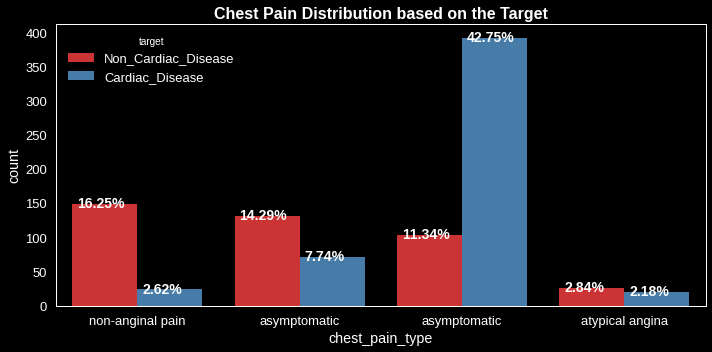

In [87]:
plt.style.use("dark_background")
figure, axis = plt.subplots(figsize=(10,5))
Category = d2['chest_pain_type']
axis = sns.countplot(x='chest_pain_type', hue='target', data=df, palette='Set1')
axis.set_title("Chest Pain Distribution based on the Target", fontsize = 16, weight = 'bold')
axis.set_xticklabels (Category, rotation = 0)

Aggregated = []
for i in axis.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in axis.patches:
    axis.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()
plt.grid(False)

In [82]:
d2['chest_pain_type'].value_counts()
pd.crosstab(df['chest_pain_type'], df['target'],margins = True,normalize = 'index')



target,Cardiac_Disease,Non_Cardiac_Disease
chest_pain_type,,
asymptomatic,0.790323,0.209677
atypical angina,0.138728,0.861272
non-anginal pain,0.351485,0.648515
typical angina,0.434783,0.565217
All,0.552890,0.447110


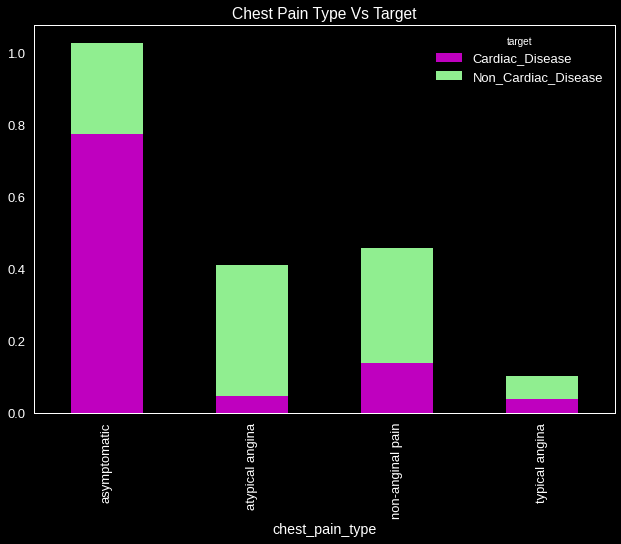

In [88]:
plt.style.use('dark_background')
#plt.title('Chest Pain Type Vs Gender')
#pd.crosstab(d2['chest_pain_type'], d2['sex'],normalize = 'columns').plot.bar(title='Chest Pain Type Vs Gender',color=['lightgreen','m'])
pd.crosstab(df['chest_pain_type'], df['target'],normalize = 'columns').plot.bar(title='Chest Pain Type Vs Target',color=['m','lightgreen'],stacked=True)
#ax.get_xaxis().set_visible(True)
plt.grid(False)

As it is a categorical feature, we are running a chi-square test

In [ ]:
!pip install researchpy
import researchpy as rp

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [111]:
#crtb, test, expt = rp.crosstab(df['chest_pain_type'], df['target'], test = "chi-square", expected_freqs = True)
crtb, test, expt = rp.crosstab(df['chest_pain_type'], df['target'], test = "chi-square", expected_freqs = True)
print('\033[1m' + 'CROSSTAB:'+ '\033[0m'+ '\n{}'.format(crtb))
print('\033[1m' + '\nCHI-SQUARE TEST:'+ '\033[0m'+ '\n{}'.format(test))
print('\033[1m' + '\nEXPECTED COUNT:'+ '\033[0m'+ '\n{}'.format(expt))

CROSSTAB:
                         target                       
target           Cardio_Disease No_Cardio_Disease  All
chest_pain_type                                       
asymptomatic                392               104  496
atypical angina              24               149  173
non-anginal pain             71               131  202
typical angina               20                26   46
All                         507               410  917

CHI-SQUARE TEST:
                Chi-square test   results
0  Pearson Chi-square ( 3.0) =   268.8963
1                    p-value =     0.0000
2                 Cramer's V =     0.5415

EXPECTED COUNT:
                         target                  
target           Cardio_Disease No_Cardio_Disease
chest_pain_type                                  
asymptomatic         274.233370        221.766630
atypical angina       95.649945         77.350055
non-anginal pain     111.683751         90.316249
typical angina        25.432933         20.5670

In [113]:
#df['target'] = df['target'].apply(lambda  x:'Cardiac_Disease' if x==1 else 'Non_Cardiac_Disease')
#d3=df[df['chest_pain_type']=='asymptomatic']
#d3['chest_pain_type'] = d3['chest_pain_type'].apply(lambda  x:1 if x=='asymptomatic' else 0)
df['chest_pain_type'] = df['chest_pain_type'].apply(lambda  x:1 if x=='asymptomatic' else 0)
#d1=df[df['target']=='No_Cardiac_Disease']

In [114]:
df['chest_pain_type'].nunique()

2

In [115]:
crtb, test, expt = rp.crosstab(df['chest_pain_type'], df['target'], test = "chi-square", expected_freqs = True)
print('\033[1m' + 'CROSSTAB:'+ '\033[0m'+ '\n{}'.format(crtb))
print('\033[1m' + '\nCHI-SQUARE TEST:'+ '\033[0m'+ '\n{}'.format(test))
print('\033[1m' + '\nEXPECTED COUNT:'+ '\033[0m'+ '\n{}'.format(expt))

CROSSTAB:
                        target                       
target          Cardio_Disease No_Cardio_Disease  All
chest_pain_type                                      
0                          115               306  421
1                          392               104  496
All                        507               410  917

CHI-SQUARE TEST:
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   246.3752
1                    p-value =     0.0000
2               Cramer's phi =     0.5183

EXPECTED COUNT:
                        target                  
target          Cardio_Disease No_Cardio_Disease
chest_pain_type                                 
0                    232.76663         188.23337
1                    274.23337         221.76663


**RESULT**

With regards to chi-square value (1) = 193.8514, 𝑝 < .001, 𝑝ℎ𝑖 =.52. There was a significant association between the asymptomatic chest pain type of a person and the cardiovascular disease 

**Target Variable Distribution**

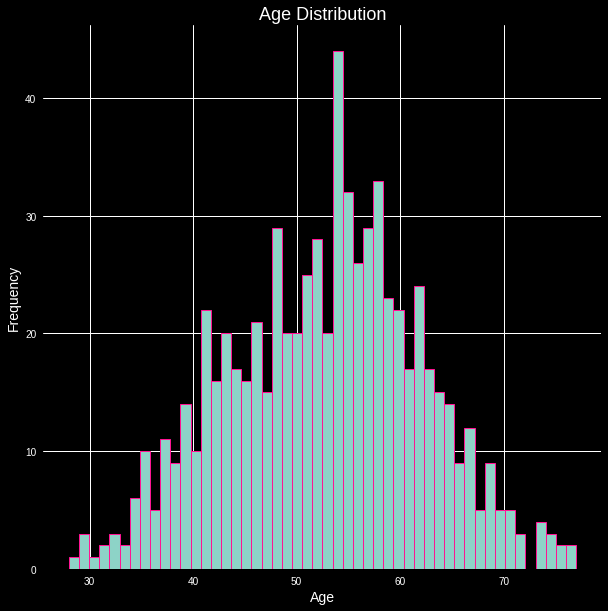

In [ ]:
plt.style.use("dark_background")
plt.rcParams['figure.figsize'] = [10, 10]
df['age'].plot.hist(bins = 50, edgecolor = 'deeppink', linewidth = 1.0)
plt.ylabel('Frequency', fontsize = 14) # y-axis label
plt.xlabel('Age', fontsize = 14) # x-axis label
plt.title('Age Distribution', fontsize = 18) # main title
plt.show()

In [ ]:
#Explore the distribution of age feature in range
print("Minimum Age:{}".format(min(df['age'])))
print("Maximum Age:{}".format(max(df['age'])))
print("Mean value of Age:{}".format(round(df.age.mean())))

Minimum Age:28
Maximum Age:77
Mean value of Age:54


Gender Distribution with respect to target variable

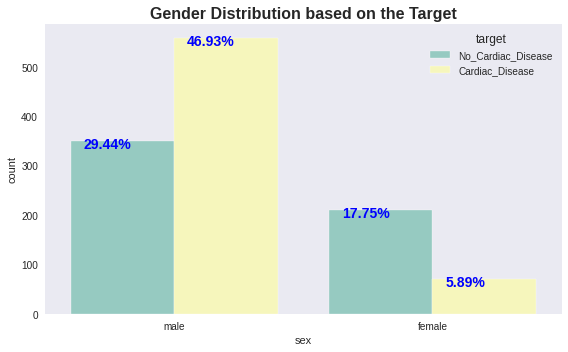

In [ ]:
plt.style.use("seaborn")
#df['target'] = df.target.replace({1: "Cardio_Disease", 0: "No_Cardio_Disease"})
#df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
figure, axis = plt.subplots(figsize=(8,5))
Category = df['sex']
axis = sns.countplot(x='sex', hue='target', data=df, palette='Set3')
axis.set_title("Gender Distribution based on the Target", fontsize = 16, weight = 'bold')
axis.set_xticklabels (Category, rotation = 0)

Aggregated = []
for i in axis.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in axis.patches:
    axis.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='blue', weight = 'bold')  
plt.tight_layout()
plt.grid(False)

Chestpain distribution with respect to target variable

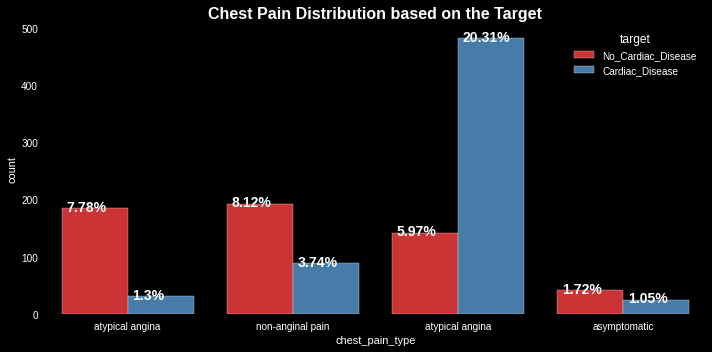

In [ ]:
plt.style.use("dark_background")
figure, axis = plt.subplots(figsize=(10,5))
Category = df['chest_pain_type']
axis = sns.countplot(x='chest_pain_type', hue='target', data=df, palette='Set1')
axis.set_title("Chest Pain Distribution based on the Target", fontsize = 16, weight = 'bold')
axis.set_xticklabels (Category, rotation = 0)

AGgregated = []
for i in axis.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in axis.patches:
    axis.text(i.get_x()+.03, i.get_height()-5,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()
plt.grid(False)

Fasting Blood Sugar distribution with respect to target variable

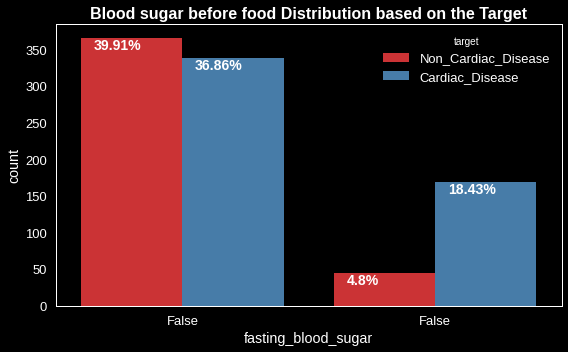

In [90]:
#df['target'] = df['target'].replace({1: "Cardio_Disease", 0: "No_Cardio_Disease"})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace({1: "True", 0: "False"})
figure, axis = plt.subplots(figsize=(8,5))
Category = df['fasting_blood_sugar']
axis = sns.countplot(x='fasting_blood_sugar', hue='target', data=df, palette='Set1')
axis.set_title("Blood sugar before food Distribution based on the Target", fontsize = 16, weight = 'bold')
axis.set_xticklabels (Category, rotation = 0)

Aggregated = []
for i in axis.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in axis.patches:
    axis.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()
plt.grid(False)

Slope Distribution with respect to Target

In [ ]:
df.nunique()

age                         50
sex                          2
chest_pain_type              4
resting_blood_pressure      67
cholesterol                222
fasting_blood_sugar          2
rest_ecg                     3
max_heart_rate             119
exercise_induced_angina      2
st_depression               53
st_slope                     4
target                       2
dtype: int64

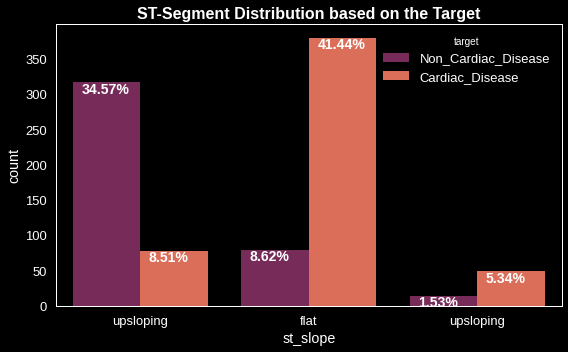

In [89]:
#df['fasting_blood_sugar'] = df['fasting_blood_sugar'].replace({1: "True", 0: "False"})
figure, axis = plt.subplots(figsize=(8,5))
Category = df['st_slope']
axis = sns.countplot(x='st_slope', hue='target', data=df, palette='rocket')
axis.set_title("ST-Segment Distribution based on the Target", fontsize = 16, weight = 'bold')
axis.set_xticklabels (Category, rotation = 0)

Aggregated = []
for i in axis.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in axis.patches:
    axis.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')  
plt.tight_layout()
plt.grid(False)

**Chest Pain Type Distribution**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


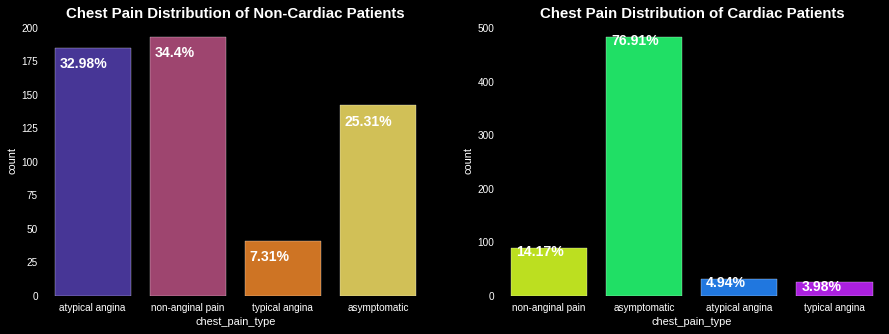

In [ ]:
# Non-Cardiac Patients 
fig = plt.figure(figsize=(15,5))
a1 = plt.subplot2grid((1,2),(0,0))
#colors= ['Green','Orange','Purple','Cyan']
a2=sns.countplot(d1['chest_pain_type'],palette="CMRmap")
plt.title('Chest Pain Distribution of Non-Cardiac Patients', fontsize=15, weight='bold')
Aggregated = []
for i in a2.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in a2.patches:
    a2.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold') 
plt.grid(False)

# Cardiac Patients
ax1 = plt.subplot2grid((1,2),(0,1))
a2=sns.countplot(d2['chest_pain_type'], palette='hsv')
plt.title('Chest Pain Distribution of Cardiac Patients', fontsize=15, weight='bold')
Aggregated = []
for i in a2.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in a2.patches:
    a2.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold') 
plt.grid(False)
#plt.subplots_adjust(left=0.0, right=1.5)
plt.show()

**REST ECG DISTRIBUTION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


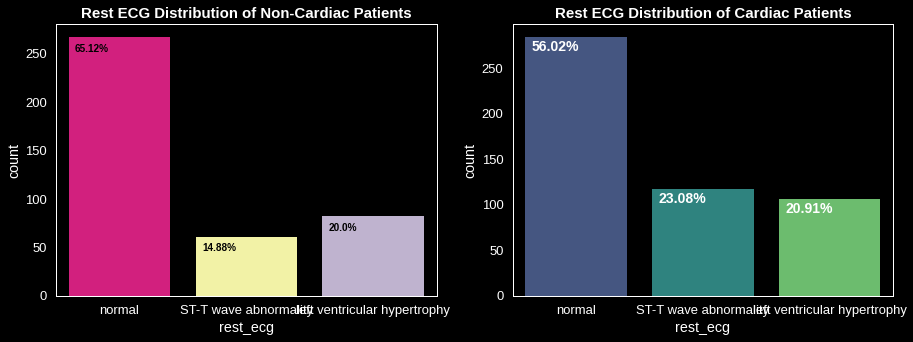

In [92]:
# Non-Cardiac patients
fig = plt.figure(figsize=(15,5))
a1 = plt.subplot2grid((1,2),(0,0))
a2=sns.countplot(d1['rest_ecg'],palette='Accent_r')
plt.title('Rest ECG Distribution of Non-Cardiac Patients', fontsize=15, weight='bold')
Aggregated = []
for i in a2.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in a2.patches:
    a2.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='Black', weight = 'bold') 
plt.grid(False)

#Cardiac patients
a1 = plt.subplot2grid((1,2),(0,1))
a2=sns.countplot(d2['rest_ecg'], palette='viridis')
plt.title('Rest ECG Distribution of Cardiac Patients', fontsize=15, weight='bold' )
Aggregated = []
for i in a2.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in a2.patches:
    a2.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold') 
plt.grid(False)
plt.show()

**ST-SLOPE DISTRIBUTION**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


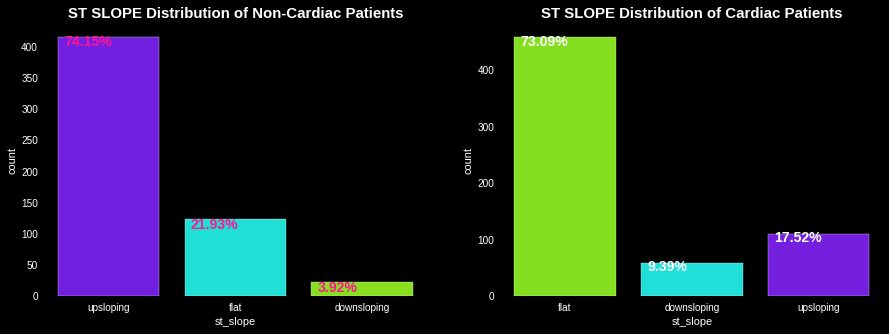

In [ ]:
fig = plt.figure(figsize=(15,5))
a1 = plt.subplot2grid((1,2),(0,0))
a2=sns.countplot(d1['st_slope'],palette='hsv_r')
plt.title('ST SLOPE Distribution of Non-Cardiac Patients', fontsize=15, weight='bold')
Aggregated = []
for i in a2.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in a2.patches:
    a2.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='deeppink', weight = 'bold') 
plt.grid(False)

#Cardiac patients
a1 = plt.subplot2grid((1,2),(0,1))
a2=sns.countplot(d2['st_slope'], palette='hsv')
plt.title('ST SLOPE Distribution of Cardiac Patients', fontsize=15, weight='bold' )
Aggregated = []
for i in a2.patches:
    Aggregated.append(i.get_height())
total = sum(Aggregated)
for i in a2.patches:
    a2.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold') 
plt.grid(False)
plt.show()

**NUMERICAL VALUES DISTRIBUTION**

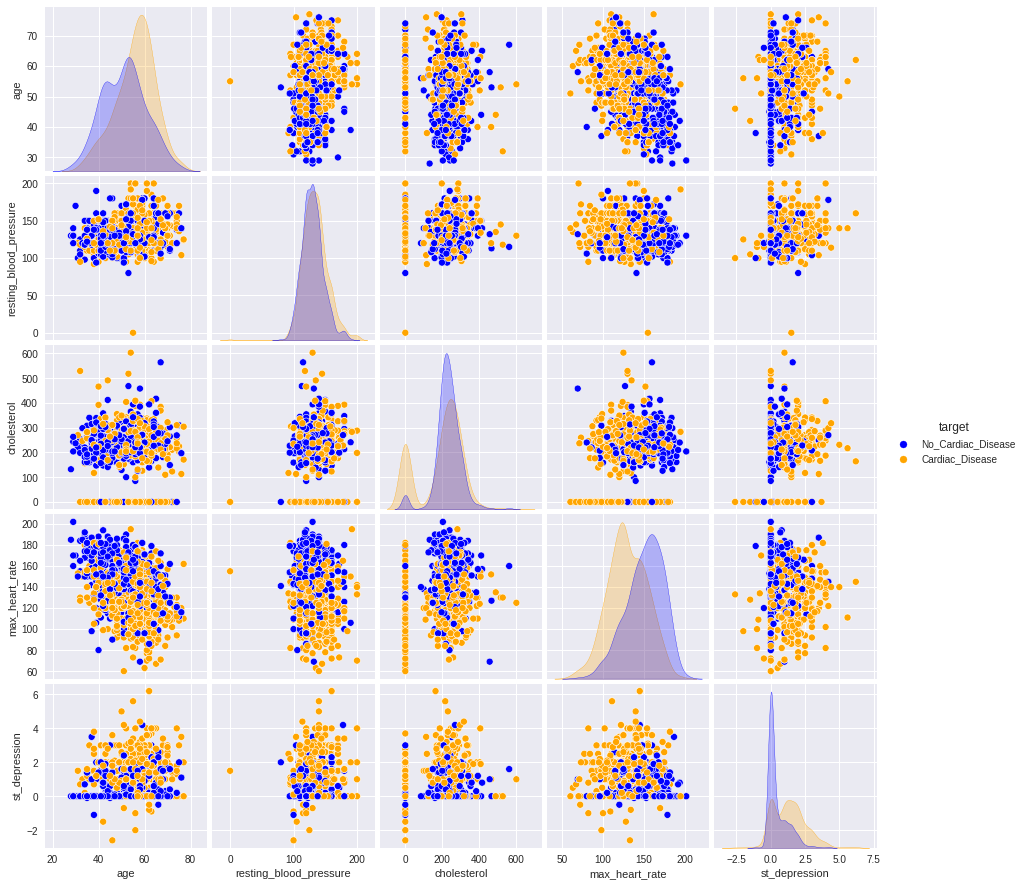

In [ ]:
plt.style.use('seaborn')
colors=['blue','orange']
customPalette = sns.set_palette(sns.color_palette(colors))
sns.pairplot(df, hue = 'target', vars = ['age', 'resting_blood_pressure', 'cholesterol','max_heart_rate','st_depression'],palette= customPalette)
plt.grid(False)

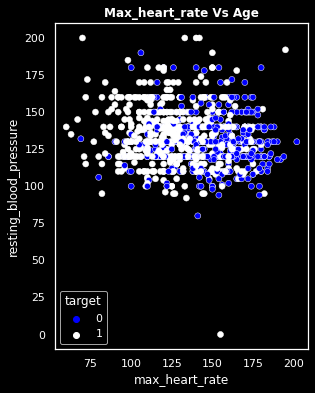

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10, 6]
colors=['blue','white']
customPalette = sns.set_palette(sns.color_palette(colors))
a1 = plt.subplot2grid((1,2),(0,0))
sns.scatterplot(x = 'max_heart_rate', y = 'resting_blood_pressure', hue = 'target', data = df,palette=customPalette)
plt.title("Max_heart_rate Vs Age",weight='bold')
plt.grid(False)

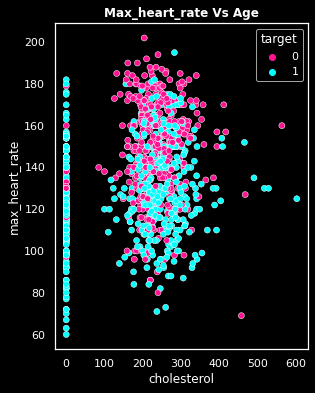

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10, 6]
colors=['deeppink','cyan']
customPalette = sns.set_palette(sns.color_palette(colors))
a1 = plt.subplot2grid((1,2),(0,0))
sns.scatterplot(x = 'cholesterol', y = 'max_heart_rate', hue = 'target', data = df,palette=customPalette)
plt.title("Max_heart_rate Vs Age",weight='bold')
plt.grid(False)

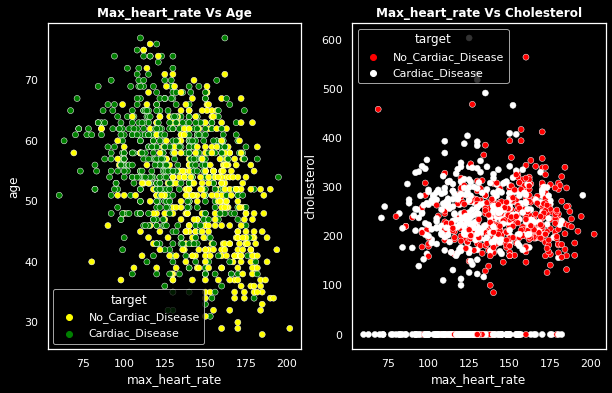

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10, 6]
colors=['yellow','green']
customPalette = sns.set_palette(sns.color_palette(colors))
a1 = plt.subplot2grid((1,2),(0,0))
sns.scatterplot(x = 'max_heart_rate', y = 'age', hue = 'target', data = df,palette=customPalette)
plt.title("Max_heart_rate Vs Age",weight='bold')
plt.grid(False)

colors=['red','white']
customPalette = sns.set_palette(sns.color_palette(colors))
a1 = plt.subplot2grid((1,2),(0,1))
sns.scatterplot(x = 'max_heart_rate', y = 'cholesterol', hue = 'target', data = df, palette=customPalette)
plt.title("Max_heart_rate Vs Cholesterol",weight='bold')
plt.grid(False)

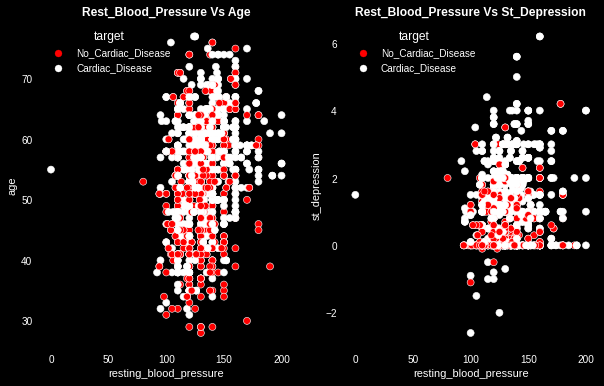

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10, 6]
colors=['red','white']
customPalette = sns.set_palette(sns.color_palette(colors))
a1 = plt.subplot2grid((1,2),(0,0))
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = df,palette=customPalette)
plt.title("Rest_Blood_Pressure Vs Age",weight='bold')
plt.grid(False)

colors=['red','white']
customPalette = sns.set_palette(sns.color_palette(colors))
a1 = plt.subplot2grid((1,2),(0,1))
sns.scatterplot(x = 'resting_blood_pressure', y = 'st_depression', hue = 'target', data = df, palette=customPalette)
plt.title("Rest_Blood_Pressure Vs St_Depression",weight='bold')
plt.grid(False)


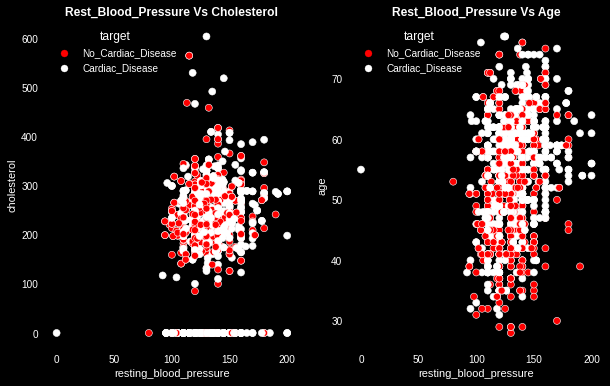

In [ ]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = [10, 6]
colors=['red','white']
customPalette = sns.set_palette(sns.color_palette(colors))
a1 = plt.subplot2grid((1,2),(0,0))
sns.scatterplot(x = 'resting_blood_pressure', y = 'cholesterol', hue = 'target', data = df,palette=customPalette)
plt.title("Rest_Blood_Pressure Vs Cholesterol",weight='bold')
plt.grid(False)

colors=['red','white']
customPalette = sns.set_palette(sns.color_palette(colors))
a1 = plt.subplot2grid((1,2),(0,1))
sns.scatterplot(x = 'resting_blood_pressure', y = 'age', hue = 'target', data = df, palette=customPalette)
plt.title("Rest_Blood_Pressure Vs Age",weight='bold')
plt.grid(False)

**WORKING WITH OUTLIERS**

In [ ]:
df_numerical = df[['age','resting_blood_pressure','cholesterol','max_heart_rate','st_depression']]

In [ ]:
df_numerical.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate,st_depression
0,40,140,289,172,0.0
1,49,160,180,156,1.0
2,37,130,283,98,0.0
3,48,138,214,108,1.5
4,54,150,195,122,0.0


In [ ]:
zs = np.abs(stats.zscore(df_numerical))
print(zs)

[[1.4325301  0.41192522 0.82458342 1.38199571 0.83320103]
 [0.47716275 1.49271328 0.17190535 0.75355495 0.10473826]
 [1.75098589 0.12846881 0.76973082 1.52454279 0.83320103]
 ...
 [0.37205267 0.12846881 0.6198682  0.85682449 0.29232612]
 [0.37205267 0.12846881 0.34005218 1.4605508  0.83320103]
 [1.64483396 0.30384642 0.21761585 1.42127325 0.83320103]]


In [ ]:
threshold = 3
print(np.where(zs > 3))

(array([ 76, 109, 149, 166, 241, 324, 365, 390, 399, 449, 591, 615, 701,
       731, 758, 770, 790, 849, 899]), array([2, 1, 2, 4, 1, 4, 1, 3, 1, 1, 1, 2, 4, 1, 1, 4, 4, 4, 4]))


In [ ]:
df = df[(zs < 3).all(axis=1)]

**CORRELATION BETWEEN FEATURES**

In [93]:
df['target'] = df['target'].apply(lambda  x:1 if x=='Cardiac_Disease' else 0)

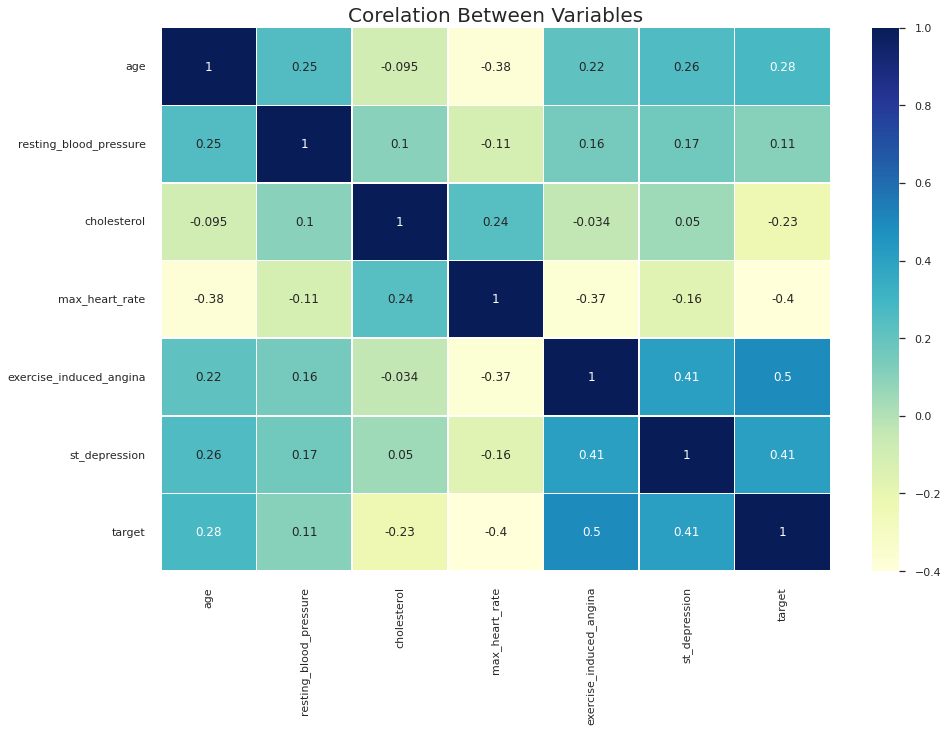

In [94]:
sns.set(style="white") 
plt.rcParams['figure.figsize'] = (15, 10) 
sns.heatmap(df.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Variables', fontsize = 20)
plt.show()

Based on the above visual,
1. There is no multicollinearity between the features.
2. Age,Chest_pain_type and exercise_induced_angina, are having positive correlation with the target feature.
3. Max_heart_rate is having negative correlation with the target feature.
4. Other features are having low correlation with the target feature.

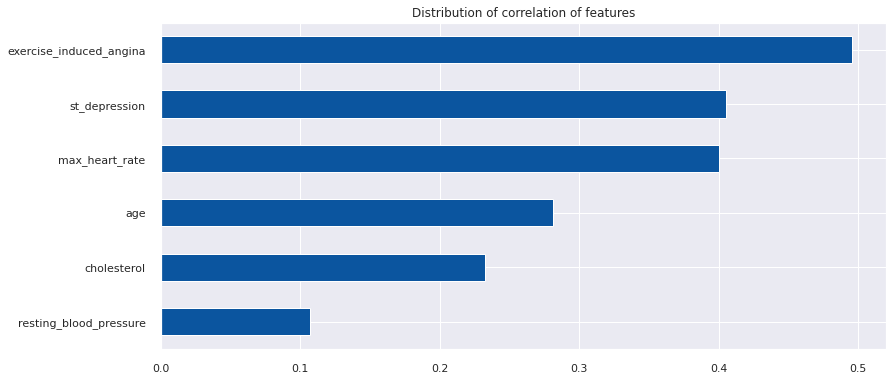

In [95]:
sns.set_style('darkgrid')
sns.set_palette('Blues_r')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(df.corr()['target']).sort_values()[:-1].plot.barh()
#abs(df.corr()['target'])
plt.show()

The features exerise_induced_angina, chest_pain_type, st_depression, max_heart rate and age are having better correlation with the target feature in total.

**Prediction Model Build**

**Logistic Regression** 

In [124]:
df['target'] = df['target'].apply(lambda  x:1 if x=='Cardiac_Disease' else 0)

In [216]:
df['target'].nunique()

2

In [217]:
# To get key statistics for each of the target groups on selected variables, run:
df[['cholesterol', 'age', 'resting_blood_pressure', 'max_heart_rate']].groupby(df['target']).describe().round(3)


cholesterol                                                       \
             count     mean      std  min     25%    50%     75%    max   
target                                                                    
0            410.0  227.122   74.635  0.0  197.25  227.0  266.75  564.0   
1            507.0  175.903  126.513  0.0    0.00  217.0  267.00  603.0   

          age          ... resting_blood_pressure        max_heart_rate  \
        count    mean  ...                    75%    max          count   
target                 ...                                                
0       410.0  50.551  ...                  140.0  190.0          410.0   
1       507.0  55.876  ...                  145.0  200.0          507.0   

                                                           
           mean     std   min    25%    50%    75%    max  
target                                                     
0       148.151  23.288  69.0  134.0  150.0  165.0  202.0  
1       127.647  23.409  60.0  112.0  126.0  144.5  195.0  

[2 rows x 32 columns]

In [218]:
df.shape

(917, 12)

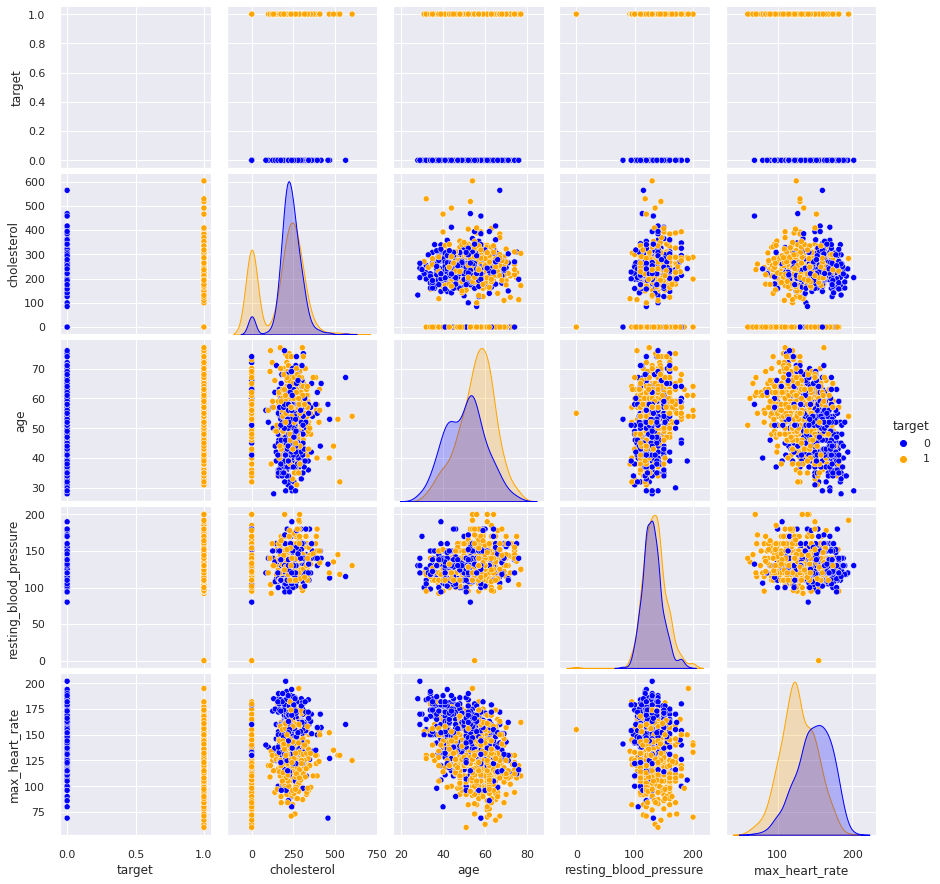

In [219]:
#Pairplot
colors=['blue','orange']
customPalette = sns.set_palette(sns.color_palette(colors))
sns.pairplot(df, vars = ['target', 'cholesterol', 'age','resting_blood_pressure','max_heart_rate'], hue = 'target', palette=customPalette)

In [228]:
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
target                     0
cholesterol_int            0
age_int                    0
rbs_int                    0
mhr_int                    0
dtype: int64

In [221]:
# 1. Linearity of independent variables and log odds
# Creating log transformed IVs & 
# Obtain interaction terms between each predictor and the log of itself.
import statsmodels.api as sm
df['cholesterol_int'] = np.log(df['cholesterol'])*df['cholesterol']
df['age_int'] = np.log(df['age'])*df['age']
df['rbs_int'] = np.log(df['resting_blood_pressure'])*df['resting_blood_pressure']
df['mhr_int'] = np.log(df['max_heart_rate'])*df['max_heart_rate']


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [251]:
df['cholesterol_int'].fillna((df['cholesterol_int'].mean()), inplace=True)
df['rbs_int'].fillna((df['rbs_int'].mean()), inplace=True)

In [252]:
x = df[['cholesterol', 'age', 'resting_blood_pressure', 'max_heart_rate','cholesterol_int','age_int','rbs_int','mhr_int']]
x = sm.add_constant(x)
y = df ['target']
# Checking the assumption - met the assumption as p-values for the interaction terms >.05.
logit_assump = sm.Logit(y, x)
print(logit_assump.fit().summary())

Optimization terminated successfully.
         Current function value: 0.550361
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  917
Model:                          Logit   Df Residuals:                      908
Method:                           MLE   Df Model:                            8
Date:                Wed, 15 Jun 2022   Pseudo R-squ.:                  0.1995
Time:                        20:34:44   Log-Likelihood:                -504.68
converged:                       True   LL-Null:                       -630.48
Covariance Type:            nonrobust   LLR p-value:                 7.926e-50
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.7364      7.953     -0.470      0.638     -19.324     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Cholesterol and cholesterol_int P values is 0.0 which is less than 0.05 so, this feature doesn't the linerarity assumption of logistic regression. Due to this we are removing this variable

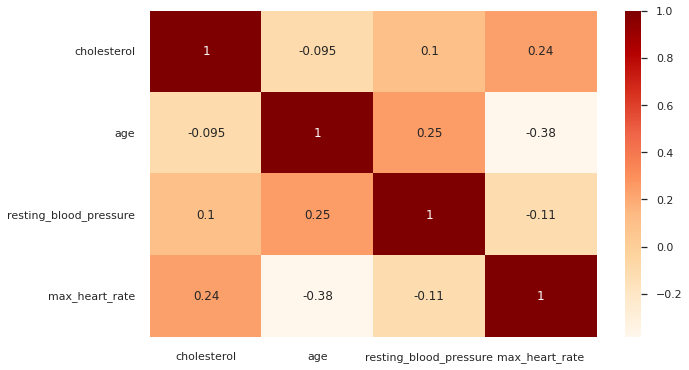

In [246]:
df[['cholesterol', 'age', 'resting_blood_pressure', 'max_heart_rate']].corr().round(3)
plt.subplots(figsize=(10, 6))
corrMatrix = df[['cholesterol', 'age', 'resting_blood_pressure', 'max_heart_rate']].corr()
sns.heatmap(corrMatrix, annot = True, cmap="OrRd")

In [248]:
#Split the data 30/70
from sklearn.model_selection import train_test_split
x = df[['age', 'resting_blood_pressure', 'max_heart_rate']]
x = sm.add_constant(x)
#x = df[['age', 'max_heart_rate']]
y = df ['target']
log_mdl = sm.Logit(df['target'], x).fit()
print(log_mdl.summary2()) 
#x_train, x_test, y_train, y_test =  train_test_split(x,y, test_size = 0.30, random_state = 8)
print("-2LL:", log_mdl.llr.round(3))
print("p-value:", log_mdl.llr_pvalue.round(3))


Optimization terminated successfully.
         Current function value: 0.589381
         Iterations 5
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.143     
Dependent Variable:    target            AIC:               1088.9252 
Date:                  2022-06-15 18:34  BIC:               1108.2097 
No. Observations:      917               Log-Likelihood:    -540.46   
Df Model:              3                 LL-Null:           -630.48   
Df Residuals:          913               LLR p-value:       8.7030e-39
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        5.0000                                         
----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                   2.2390   0.8560  2.6157 0.0089  0.5613  3.9167
age

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Coefficients are difficult to interpret in logistic regression models, so we will transform them into odds ratios by calculating the exponent raised to the power of coefficients.

In [249]:
print("* Odds ratio for AGE:", np.exp(0.0354).round(3))
print("* Odds ratio for RBP:", np.exp(0.0042).round(3))
print("* Odds ratio for MHR:", np.exp(-0.0324).round(3))

* Odds ratio for AGE: 1.036
* Odds ratio for RBP: 1.004
* Odds ratio for MHR: 0.968


In [255]:
#Confusion Matrix
# Calculating predicted y-values for each var by using the ‘predict’ function:
y_pred = log_mdl.predict(x)
from sklearn.metrics import (confusion_matrix, accuracy_score)

# Create a confusion matrix
cm = confusion_matrix(y, y_pred.round()) 
print("Confusion Matrix : \n", cm)

## Calculate the accuracy score of the model
print('Test accuracy = ', accuracy_score(y, y_pred.round()))

print(classification_report(y_train, y_train_pred.round()))


Confusion Matrix : 
 [[275 135]
 [107 400]]
Test accuracy =  0.7360959651035986
              precision    recall  f1-score   support

           0       0.71      0.67      0.69       282
           1       0.75      0.79      0.77       359

    accuracy                           0.74       641
   macro avg       0.73      0.73      0.73       641
weighted avg       0.74      0.74      0.74       641



In [256]:
#Splitting the dataset (30/70)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 8)
x_train = sm.add_constant(x_train) # Add the constant
log_mdl = sm.Logit(y_train, x_train).fit() # Fit a model
print(log_mdl.summary2()) 

from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report)
y_train_pred = log_mdl.predict(x_train)
# confusion matrix
# labels on the test data vs. predicted data
cm = confusion_matrix(y_train, y_train_pred.round())
print ("Confusion Matrix : \n", cm) # introducing a new line
# accuracy score of the model
print('Test accuracy = ', accuracy_score(y_train, y_train_pred.round()))


Optimization terminated successfully.
         Current function value: 0.546782
         Iterations 9
                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.203     
Dependent Variable:   target             AIC:                718.9747  
Date:                 2022-06-15 21:19   BIC:                759.1420  
No. Observations:     641                Log-Likelihood:     -350.49   
Df Model:             8                  LL-Null:            -439.67   
Df Residuals:         632                LLR p-value:        2.2661e-34
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       9.0000                                           
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
const                  -3.0943   9.7719 -0.3167 0.7515 -22.2468

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [258]:
print(classification_report(y_train, y_train_pred.round()))

              precision    recall  f1-score   support

           0       0.71      0.67      0.69       282
           1       0.75      0.79      0.77       359

    accuracy                           0.74       641
   macro avg       0.73      0.73      0.73       641
weighted avg       0.74      0.74      0.74       641



**Model Evaluation**

In [259]:
# performing predictions on the test datdaset
x_test = sm.add_constant(x_test) # Add the constant
y_test_pred = log_mdl.predict(x_test)
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred.round()) 
print ("Confusion Matrix : \n", cm)
# accuracy scores of the model
print('Test accuracy = ', accuracy_score(y_test, y_test_pred.round()))
print(classification_report(y_test, y_test_pred.round()))

Confusion Matrix : 
 [[ 87  41]
 [ 32 116]]
Test accuracy =  0.7355072463768116
              precision    recall  f1-score   support

           0       0.73      0.68      0.70       128
           1       0.74      0.78      0.76       148

    accuracy                           0.74       276
   macro avg       0.73      0.73      0.73       276
weighted avg       0.74      0.74      0.73       276



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
